# PROJECT : POLAND BANKRUPTY

### Workflow 
    
    - Prepare
        
        - Import

        - Explore

        - Split

        -Resample
    
    - Build Model

        - Baseline

        - Iterate

        - Evaluate

    - Result Communication

        - Feature Importance

### Libraries 

In [13]:
# Importing packages

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


Gathering Data 

In [2]:
csv_data = pd.read_csv("poland_data.csv")

In [3]:
# Creating Wrangle function

def wrangle(data):

    data  = data.set_index("company_id")
    
    return data

In [5]:
poland_data = wrangle(csv_data)
poland_data.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
1,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.12250,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.17210,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.98810,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
5,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.40940,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False
6,0.182060,0.55615,0.32191,1.6045,16.3140,0.00000,0.182060,0.79808,1.8126,0.44385,...,0.555770,0.410190,0.46957,0.029421,8.4553,3.3488,107.240,3.4036,12.4540,False


- Inspect Data

In [18]:
# Inspect frame

poland_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 1 to 10503
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feat_1    9977 non-null   float64
 1   feat_2    9977 non-null   float64
 2   feat_3    9977 non-null   float64
 3   feat_4    9960 non-null   float64
 4   feat_5    9952 non-null   float64
 5   feat_6    9977 non-null   float64
 6   feat_7    9977 non-null   float64
 7   feat_8    9964 non-null   float64
 8   feat_9    9974 non-null   float64
 9   feat_10   9977 non-null   float64
 10  feat_11   9977 non-null   float64
 11  feat_12   9960 non-null   float64
 12  feat_13   9935 non-null   float64
 13  feat_14   9977 non-null   float64
 14  feat_15   9970 non-null   float64
 15  feat_16   9964 non-null   float64
 16  feat_17   9964 non-null   float64
 17  feat_18   9977 non-null   float64
 18  feat_19   9935 non-null   float64
 19  feat_20   9935 non-null   float64
 20  feat_21   9205 non-null   flo

- Almost all of the features are cnumerical (float type ) instead of target variable bankrupt which is of bool type. 

- There are missing data also.

### Checking for balanced class ?

In [23]:
# Class value count
print(poland_data["bankrupt"].value_counts())

print(poland_data["bankrupt"].value_counts(normalize =True))

False    9510
True      467
Name: bankrupt, dtype: int64
False    0.953192
True     0.046808
Name: bankrupt, dtype: float64


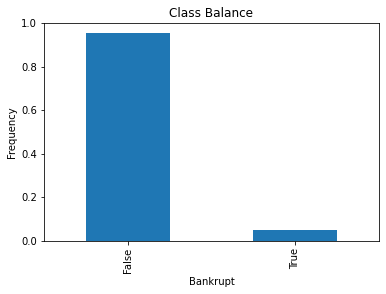

In [25]:
# Class Balance Plot
poland_data["bankrupt"].value_counts(normalize =True).plot(kind ="bar", xlabel ="Bankrupt", ylabel= "Frequency", title="Class Balance");

- Definately it is imbalance data. 

- As False is our majority class, and True is our majority class.

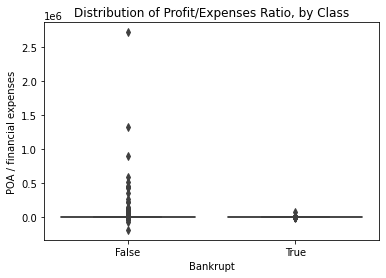

In [26]:
# Boxplot
sns.boxplot(x ="bankrupt", y= "feat_27", data = poland_data)
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

In [48]:
# Summary stats for "feat_27"
poland_data["feat_27"].describe().apply("{0:,.0f}".format)

count        9,312
mean         1,206
std         35,477
min       -190,130
25%              0
50%              1
75%              5
max      2,723,000
Name: feat_27, dtype: object

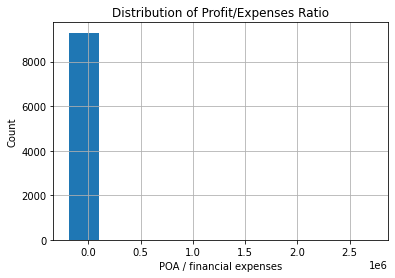

In [49]:
# Feature Histogram
poland_data["feat_27"].hist()
plt.xlabel("POA / financial expenses")
plt.ylabel("Count"),
plt.title("Distribution of Profit/Expenses Ratio");

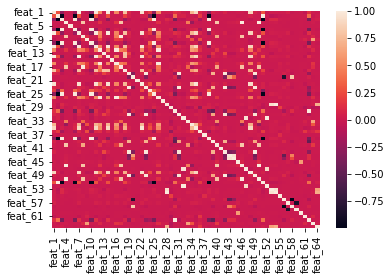

In [51]:
# Correlation Heatmap
corr = poland_data.drop(columns= "bankrupt").corr()
sns.heatmap(corr);

## TRAIN-TEST SPLIT

In [6]:
# Creating feature matrix and target vector
target = "bankrupt"
X = poland_data.drop(columns = target)

y = poland_data[target]

print("X shape:", X.shape)
print("y shape:", y.shape)


# Split data 
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size =0.2, random_state =42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X shape: (9977, 64)
y shape: (9977,)
X_train shape: (7981, 64)
y_train shape: (7981,)
X_test shape: (1996, 64)
y_test shape: (1996,)


### UNDERSTANDING CONCEPT OF UNDERSAMPLING 

- +ve shows company that goes bankrupt.

- -ve shows company that didn't goes bankrupt.

> Suppose there are only few +ve class in contrast of -ve class

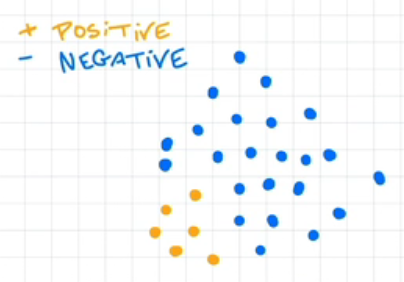


> Undersampling refers to taking a random sample in such a way that so that the sample have equal members of both class.

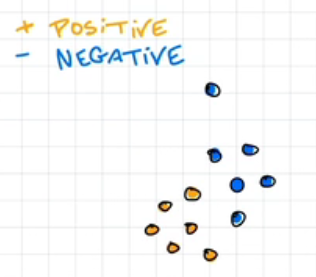

and this final sample is called undersampled data.

In [54]:
# Undersampling data 
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)

# Dimenson of new undersample data 
print(X_train_under.shape)
X_train_under.head()

(768, 64)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
company_id,,,,,,,,,,,,,,,,,,,,,
1509,0.121400,0.097238,0.74500,8.66160,25.8370,0.000000,0.158840,9.284100,2.7588,0.902760,...,775.71,0.075999,0.13447,0.94243,0.000000,4.9049,11.3390,12.865,28.3720,17.4870
6096,0.316280,0.264920,0.65346,3.46660,55.1890,0.290140,0.316280,2.774700,2.4721,0.735080,...,1367.90,0.119990,0.43027,0.87412,0.000000,10.6020,4.5533,39.115,9.3314,30.2870
7369,0.066615,0.890270,-0.48007,0.46076,-76.3080,0.047487,0.087936,-0.011406,1.0952,-0.010155,...,-46566.00,0.086894,-6.56010,0.91311,0.000000,32.0280,10.0480,105.220,3.4689,5.2362
5268,0.208000,0.363630,0.33875,1.93160,-5.3169,0.251870,0.258280,1.603300,1.0535,0.583020,...,187050.00,0.050746,0.35676,0.94925,0.000000,34.8840,19.0030,24.498,14.8990,18.2040
395,0.096863,0.299320,0.35393,2.42640,31.5630,0.267550,0.125130,2.341000,1.0495,0.700680,...,2993.00,0.047123,0.13824,0.95288,0.073041,13.7820,6.8621,39.668,9.2013,5.7376


False    0.5
True     0.5
Name: bankrupt, dtype: float64


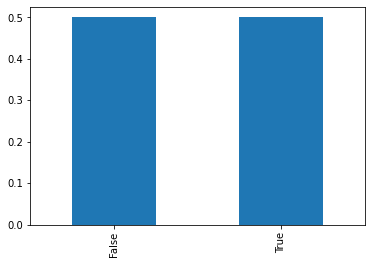

In [56]:
print(y_train_under.value_counts(normalize=True))
y_train_under.value_counts(normalize=True).plot(kind= "bar");

### UNDERSTANDING CONCEPT OF OVERSAMPLING

> So lets imagine the same case, where +ve are minority and -ve are majority. 

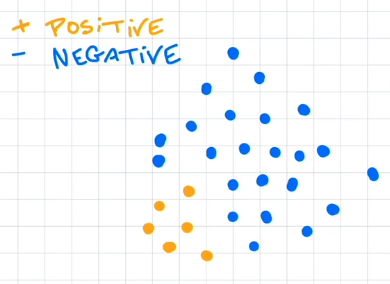

> Now this time, it took up the minority class and duplicates it until both reaches balanced distribution.

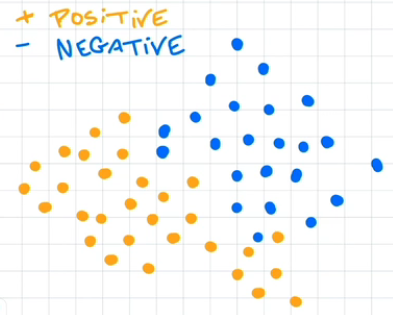

In [7]:
# Oversamplign data 

over_sampler = RandomOverSampler(random_state=42)
X_train_over,y_train_over = over_sampler.fit_resample(X_train,y_train)

# Dimension of oversampled data
print(X_train_over.shape)
X_train_over.head()


(15194, 64)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
0,0.279320,0.053105,0.852030,17.0440,199.080,0.741770,0.353570,16.00600,1.2346,0.84997,...,52857.00,0.190040,0.328630,0.80996,0.00000,NaN,4.1858,11.002,33.1760,18.5720
1,0.001871,0.735120,0.156460,1.2269,-10.837,0.000000,0.002938,0.36032,1.4809,0.26488,...,440.02,0.014794,0.007064,0.99803,0.00000,7.4268,2.2925,169.960,2.1476,9.6185
2,0.113940,0.490250,0.077121,1.2332,-43.184,-0.000171,0.113940,1.03980,1.1649,0.50975,...,4617.40,0.214890,0.223520,0.78761,0.27412,6.2791,6.1622,103.630,3.5220,1.9673
3,0.008136,0.652610,0.148120,1.2628,29.071,0.000000,0.008136,0.53230,1.2891,0.34739,...,920.98,0.045169,0.023421,0.99434,0.14403,22.7480,2.2673,159.580,2.2872,4.4718
4,0.045396,0.279640,0.708730,3.7656,238.120,0.000000,0.056710,2.57610,1.0169,0.72036,...,10744.00,0.047501,0.063019,0.94624,0.00000,13.8860,49.0660,91.984,3.9681,29.0460


False    0.5
True     0.5
Name: bankrupt, dtype: float64


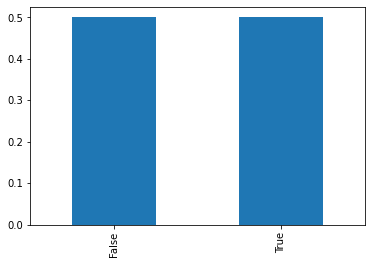

In [59]:
# Ploting target value 
print(y_train_over.value_counts(normalize=True))
y_train_over.value_counts(normalize=True).plot(kind= "bar");

## MODEL BUILD

In [60]:
# Baseline
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9519


In [62]:
# Build model for different case

# Fit on `X_train`, `y_train`
model_reg = make_pipeline(
    SimpleImputer(strategy="median"), 
    DecisionTreeClassifier(random_state=42)
)
model_reg.fit(X_train, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(
    SimpleImputer(strategy="median"), 
    DecisionTreeClassifier(random_state=42)
)
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(
    SimpleImputer(strategy="median"), 
    DecisionTreeClassifier(random_state=42)
)
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [65]:
# Model Evaluation

for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train,y_train)
    acc_test = m.score(X_test,y_test)

    if (m == model_reg ):
        print("Regular model")
    elif (m == model_under):
        print("Under Sample Model")
    else:
        print("Over Sample Model")
    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))
    print(" ")

Regular model
Training Accuracy: 1.0
Test Accuracy: 0.9359
 
Under Sample Model
Training Accuracy: 0.7421
Test Accuracy: 0.7104
 
Over Sample Model
Training Accuracy: 1.0
Test Accuracy: 0.9344
 


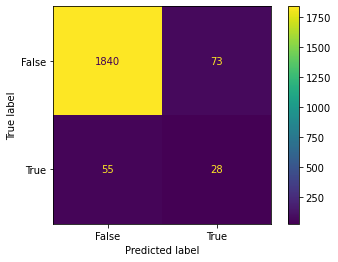

In [66]:
# Plotting Confusion matrix

ConfusionMatrixDisplay.from_estimator(model_reg,X_test,y_test) # Best model

### UNDERSTANDING CONFUSION MATRIX

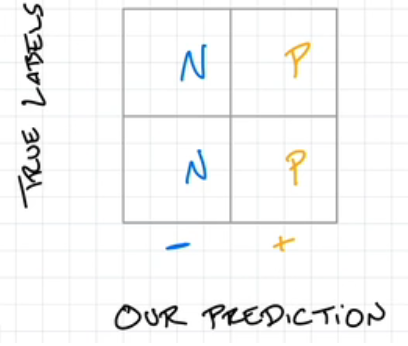

- The confusion matrix is a table that is used to describe the performance of an algorithm in classifying data into different categories or classes. It shows how many instances were correctly and incorrectly categorized.

> In our case , True(+ve) which means it goes bankrupt. False represent company with no bankrupcy . so we put in matrix in form of `N` and `P`.

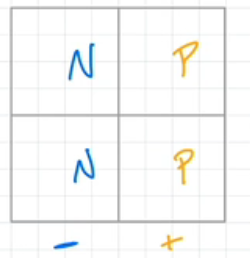

> The above daigram shows possiblities prediction by model reprsent on x axis.


> Now came up with real scenarios means Real label on y-axis repsenting real case scenerios where P(+ve) means actually get bankrupt and N(-ve) not get banrupt. It can be visualized as :

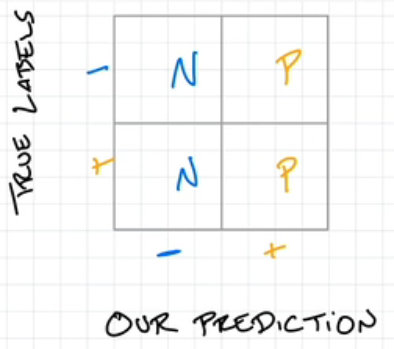


- So now u understand that in real case scneraio there are only two condition applied to model , but confusion matrix further break into 4 possible condition, lets understand them one by one.

    - Case for Right Prediction by model are `TRUE POSITIVE` and `TRUE NEGATIVE`.
        
        `TRUE POSITIVE` - It means model predicted true and it gets true.

        `TRUE NEGATIVE` - It means model predicted false and it get false.

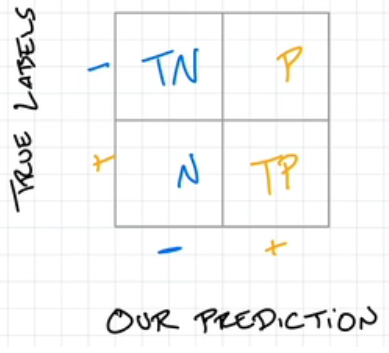


        - Case for Wrong prediction by model are `FALSE POSITIVE` and `FALSE NEGATIVE`.
        
            `FALSE POSITIVE` - It means model predicted true but it gets false.

            `FALSE NEGATIVE` - It means model predicted false and it get true.

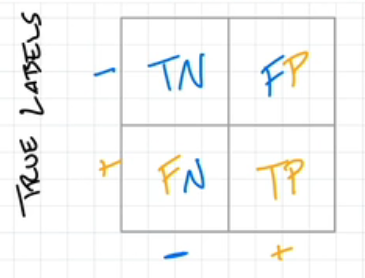



In [68]:
# Depth of model for over sample

depth = model_over.named_steps["decisiontreeclassifier"].get_depth()
depth


33

### COMMUNICATION

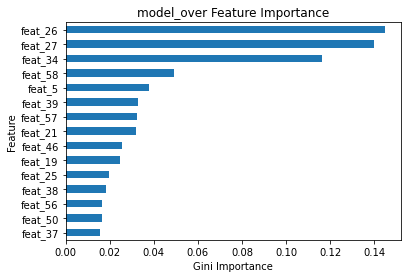

In [72]:
# Feature Importance
importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_

feat_imp = pd.Series(importances, index=X_train_over.columns).sort_values()


# Plotting

feat_imp.tail(15).plot(kind="barh")

plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

### ENSEMBLE MODEL : RANDOM FOREST

- Ensemble models means combinnation of models.

- Random Forest works on bagging algorithm, in which we fit random models on subset of data such it create a forest of tress. At last during prediction, every tree put their votes and the most votes will win ...


> Lets understand it  with example

    - Suppose you are an ecologist workring on creating a artificial diversity of nature, So you create an envoirment which have combination of different eccological envoirmnets so that their can be posiiblity of different diversity.


Same for our model....     

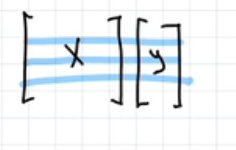

This is out feature matrix and target vector(also called the big x and small y).

Now i will say my model that you cann't interpret all features at a time, instead of this you can access a subset.  

So now my first decision tree gets created based on these subset.

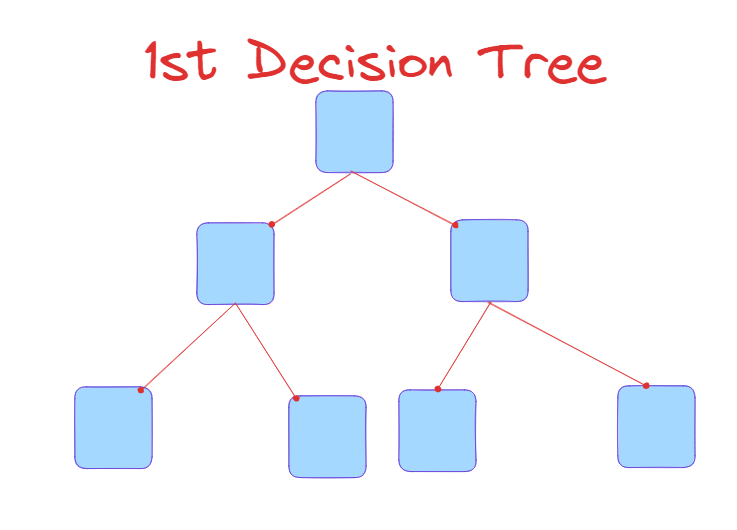

Reapeat this process for ever new subset and new features , new trees will get as a result of different size and type due to diffreent features.
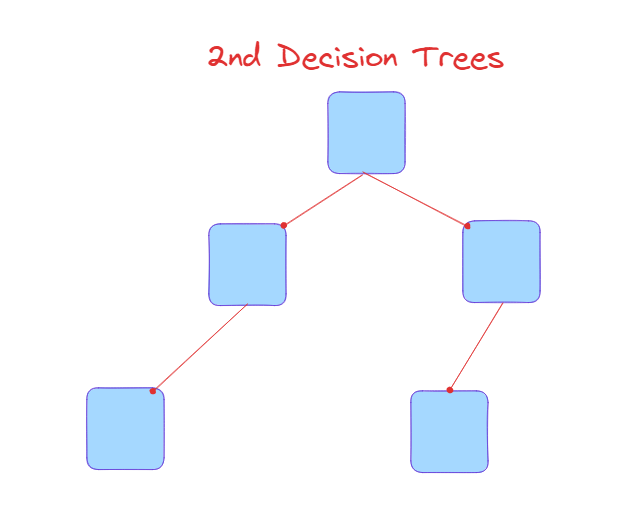

So now we have ensemble model , This time when we make prediction , every tree give prediction and majority voter will win

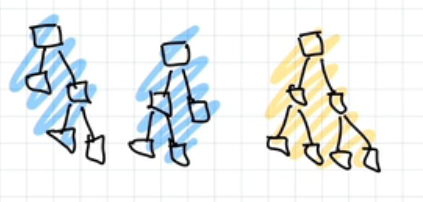

> For example blue one indicates that it gets bankrupt while yellow one says not bankrupt , so it get bankrupt as blue one are majority.




In [11]:
# Modeling a classifier contains imputer and  Decision Tree 

clf = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(random_state =42)
)

In [14]:
cv_acc_score = cross_val_score(clf,X_train_over,y_train_over,cv=5,n_jobs =-1)
print(cv_acc_score)

[0.99670944 0.99835472 0.99769661 0.9970385  0.99901251]


- Cross-Validation (Hyperparameter)

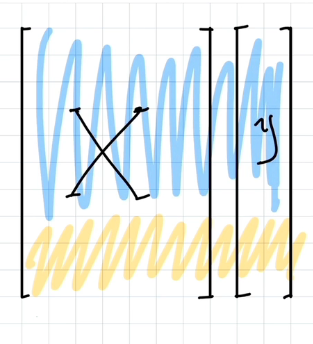

In [15]:
params = {
    "simpleimputer__strategy": ["mean","median"],
    "randomforestclassifier__n_estimators":range(25,100,25),
    "randomforestclassifier__max_depth":range(10,50,10)
}

params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [16]:
model = GridSearchCV(
    clf,
    param_grid =params,
    cv =5,
    n_jobs = -1,
    verbose=1
)

model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [17]:
# train model

model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [20]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.485010,0.698842,0.044722,0.014829,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979269,0.977295,0.977953,0.980915,0.982225,0.979532,0.001829,21
1,2.738701,0.775347,0.033322,0.009122,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.978611,0.969069,0.975650,0.970056,0.974984,0.973674,0.003586,24
2,4.582226,0.622025,0.054070,0.002564,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.983218,0.979599,0.978282,0.984534,0.983871,0.981901,0.002488,20
3,4.269799,0.603965,0.055907,0.003800,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.980257,0.971043,0.978940,0.978282,0.977617,0.977228,0.003213,23
4,6.390571,0.444638,0.105511,0.034043,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.984205,0.980586,0.976966,0.984534,0.984529,0.982164,0.002996,19
5,6.517842,0.301917,0.113428,0.017940,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.980915,0.972688,0.981573,0.979928,0.981567,0.979334,0.003377,22
6,2.754558,0.260591,0.042028,0.007289,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.996380,0.997038,0.995722,0.995393,0.997367,0.996380,0.000750,17
7,3.295561,0.307425,0.040143,0.004790,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.995722,0.996709,0.997368,0.996380,0.998025,0.996841,0.000795,14
8,4.814746,0.240819,0.077337,0.019341,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.996709,0.996709,0.995722,0.995064,0.997367,0.996314,0.000816,18
9,5.273285,0.332416,0.067695,0.006474,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.996051,0.997368,0.998026,0.996709,0.998354,0.997302,0.000843,11


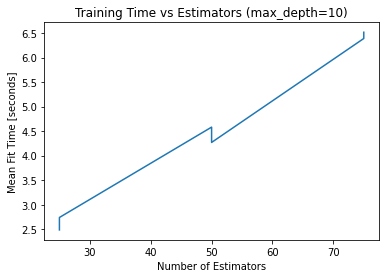

In [22]:
# Create mask
mask = cv_results["param_randomforestclassifier__max_depth"] ==10

# Plot fit time vs n_estimators
plt.plot(
    cv_results[mask]["param_randomforestclassifier__n_estimators"],
    cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

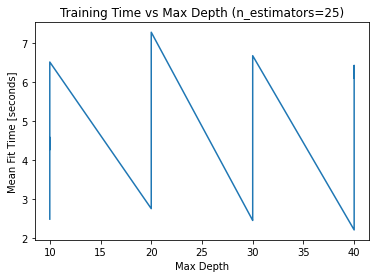

In [24]:
# Create mask
mask = cv_results["param_randomforestclassifier__n_estimators"]==25
# Plot fit time vs max_depth
plt.plot(
    cv_results[mask]["param_randomforestclassifier__max_depth"],
    cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

In [27]:
model.best_params_
model.best_score_
model.best_estimator_

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=40, n_estimators=50,
                                        random_state=42))])

In [28]:
model.predict(X_train_over)

array([False, False, False, ...,  True,  True,  True])

In [29]:
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9589


In [30]:
y_test.value_counts()

False    1913
True       83
Name: bankrupt, dtype: int64

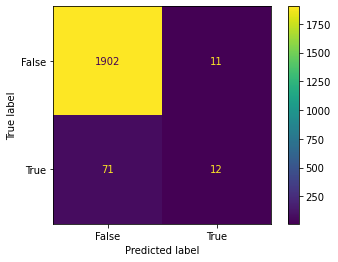

In [31]:
# plot confusion matrx
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

## COMMUNICATION

In [36]:
features = X_train_over.columns

importances = model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_

feat_imp = pd.Series(importances , index= features ).sort_values()

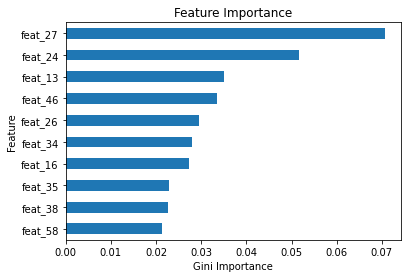

In [37]:
feat_imp.tail(10).plot(kind = "barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");